# Estrategia Pair-Trading

La idea detras de esta estrategia de trading es que los stocks relacionados, que tienen cierta correlacion, tienden a moverse juntos.

Por ejemplo, si se encuentra un comportamiento inusual, donde se separan mucho ambos stocks (suponiendo correlacion positiva), se entra en corto a la mas alta y en largo a la mas baja de las dos. A la separacion existente entre ambos stocks se le llama 'spread', cuanto mas largo sea este, mas largo podra ser el trade.

Esta estrategia es muy simple, pero sirve al proposito de crear una aplicacion web con Python desde cero..se ira mejorando.

# Datos

Se usaran datos del Dow Jones Industrial, de las 10 compañias que mas peso tienen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker

In [2]:
dji=pd.read_csv('../data/^DJI.csv')
dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-05,20745.060547,20887.500000,20639.550781,20648.150391,20648.150391,284980000
1,2017-04-06,20653.769531,20746.460938,20612.169922,20662.949219,20662.949219,251720000
2,2017-04-07,20647.810547,20726.070313,20606.949219,20656.099609,20656.099609,219730000
3,2017-04-10,20668.220703,20750.330078,20614.859375,20658.019531,20658.019531,230480000
4,2017-04-11,20644.320313,20660.029297,20512.560547,20651.300781,20651.300781,255120000


In [3]:
index=['^DJI']  # Dow Jones Industrial


stock=['BA',    # Boeing
       'GS',    # Goldman Sachs
       'UNH',   # UnitedHealth Group
       'MMM',   # 3M
       'HD',    # Home Depot
       'AAPL',  # Apple 
       'MCD',   # McDonalds
       'IBM',   # IBM
       'CAT',   # Caterpillar
       'TRV']   # Travelers

**para datos en directo o actualizados [yahoo finance](https://finance.yahoo.com)**

In [4]:
# se leen todos los csv

stock_data=[]

for e in index+stock:
    
    df=pd.read_csv('../data/'+ e + '.csv')
    df['Symbol']=e
    df=df[['Symbol', 'Date', 'Adj Close']]
    stock_data.append(df)
    
stock_data=pd.concat(stock_data)

stock_data.head()

,Symbol,Date,Adj Close
0,^DJI,2017-04-05,20648.150391
1,^DJI,2017-04-06,20662.949219
2,^DJI,2017-04-07,20656.099609
3,^DJI,2017-04-10,20658.019531
4,^DJI,2017-04-11,20651.300781


In [5]:
stock_data.Symbol.unique()

array(['^DJI', 'BA', 'GS', 'UNH', 'MMM', 'HD', 'AAPL', 'MCD', 'IBM',
       'CAT', 'TRV'], dtype=object)

In [6]:
# pivot table por simbolo, como hacer flatten para un solo stock por columna

stock_data=stock_data.pivot('Date','Symbol')
stock_data.columns=stock_data.columns.droplevel()

stock_data.head()

Symbol,AAPL,BA,CAT,GS,HD,IBM,MCD,MMM,TRV,UNH,^DJI
Date,,,,,,,,,,,
2017-04-05,141.777161,172.905151,91.817474,224.784515,143.392029,166.105453,127.264633,185.988541,118.215958,162.975571,20648.150391
2017-04-06,141.422775,173.188293,93.356865,225.752121,143.978745,165.692307,127.010887,185.646362,117.854195,162.945999,20662.949219
2017-04-07,141.107742,174.633438,93.064575,225.001724,143.871185,165.394455,126.825478,185.744141,117.472885,163.616150,20656.099609
2017-04-10,140.940399,173.373825,94.642937,225.998962,144.927246,164.491302,126.844994,185.470398,118.411491,163.083954,20658.019531
2017-04-11,139.424393,174.360031,94.603958,224.863480,144.917465,163.895584,128.035568,185.822357,118.489716,163.428894,20651.300781


# Normalizacion de los datos

Para poder comparar los diferentes stocks es necesario normalizar.
Una manera de hacer esto es usar el cambio porcentual y la suma acumulada de dicho cambio.

In [7]:
# ejemplo con Apple

pd.DataFrame({'Precio': stock_data['AAPL'], 
              'Cambio %':stock_data['AAPL'].pct_change(),
              'Suma Acum':stock_data['AAPL'].pct_change().cumsum()}).tail(10)


,Precio,Cambio %,Suma Acum
Date,,,
2018-03-21,171.270004,-0.022655,0.208167
2018-03-22,168.850006,-0.014130,0.194038
2018-03-23,164.940002,-0.023157,0.170881
2018-03-26,172.770004,0.047472,0.218353
2018-03-27,168.339996,-0.025641,0.192712
2018-03-28,166.479996,-0.011049,0.181663
2018-03-29,167.779999,0.007809,0.189471
2018-04-02,166.679993,-0.006556,0.182915
2018-04-03,168.389999,0.010259,0.193174


In [8]:
# se usan los ultimos 90 dias de datos

stock_data=stock_data.tail(90)

# Plots del spread

**entre indice y stocks**

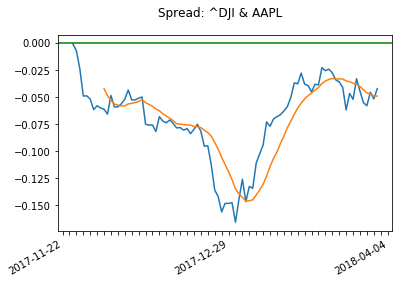

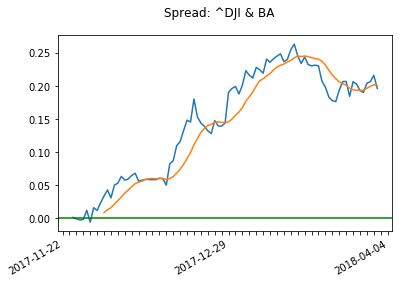

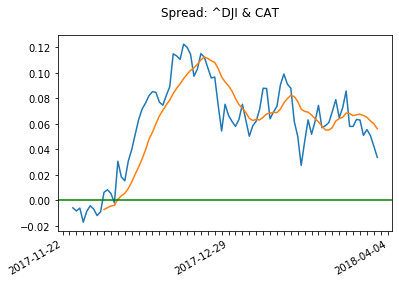

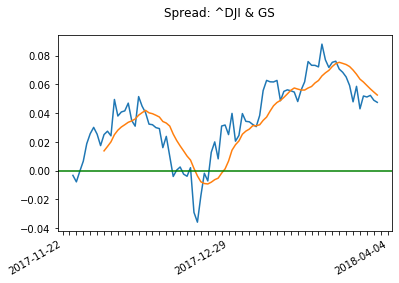

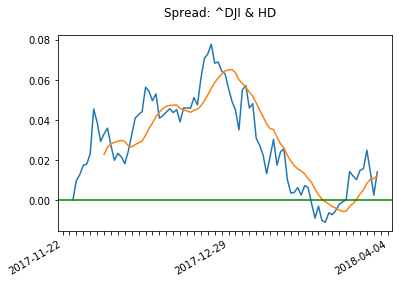

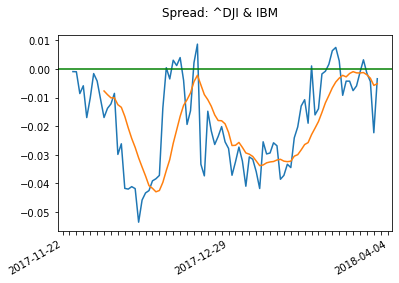

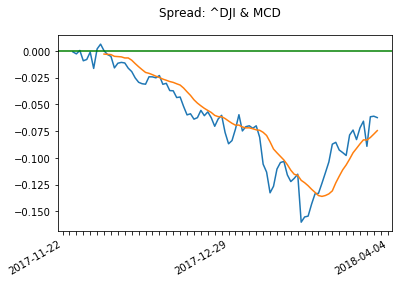

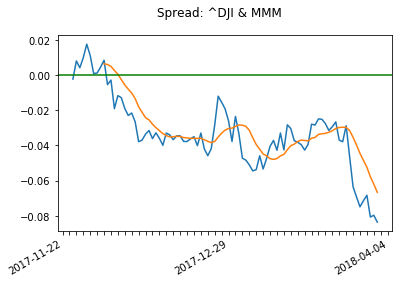

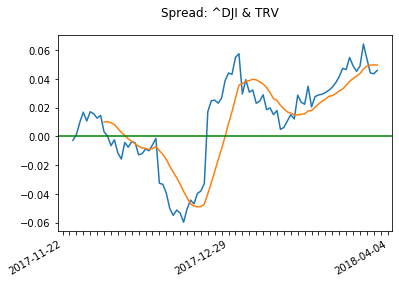

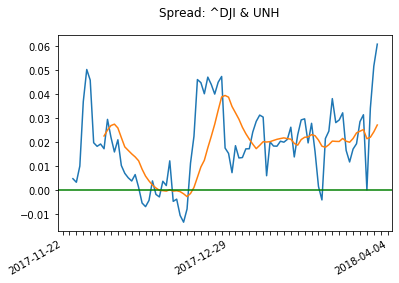

In [12]:
stock1 = '^DJI'
serie1 = stock_data[stock1].pct_change().cumsum()

for stock2 in list(stock_data):
    
    if (stock1!=stock2):
        serie2=stock_data[stock2].pct_change().cumsum()
        diff=serie2 - serie1 # el stock es la referencia

        fig, ax = plt.subplots()

        ax.plot(serie2.index, list(diff))  # serie del spread
 
        ax.plot(diff.rolling(10).mean())   # media movil
        plt.suptitle('Spread: '+stock1+' & '+stock2)
         
        ax.axhline(y=0, 
                   color='green', 
                   linestyle='-') # linea en cero

        loc=mticker.MultipleLocator(2)  # formato fechas eje x
        ax.xaxis.set_major_locator(loc)
        fig.autofmt_xdate()

        # solo muestra los extremos y el centro del eje x, fechas
        etiq=['' for item in ax.get_xticklabels()]
        etiq[1]=serie2.index[0]
        etiq[int(len(etiq)/2)]=serie2.index[int(len(etiq)/2)]
        etiq[-2]=serie2.index[-1]
        ax.set_xticklabels(etiq)

        plt.show();